# Support Vector Machine Classifier

1. Supervised Learning Model
2. Both Classification & Regression
3. Hyperplane
4. Support Vectors

### Hyperplane

Hyperplane is a line (in 2D space) or a plane that seprate the data points into 2 classes.


### Support Vectors
Support Vectors are the data points which lie nearest to the hyperplane. If these data points changes, the poistions of the hyperplane changes.

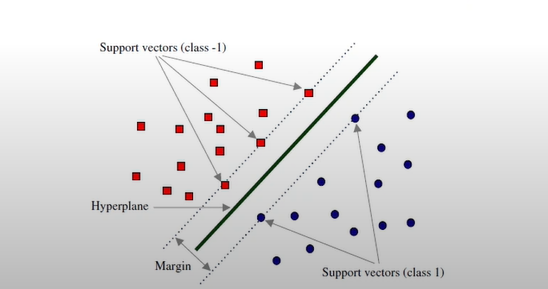


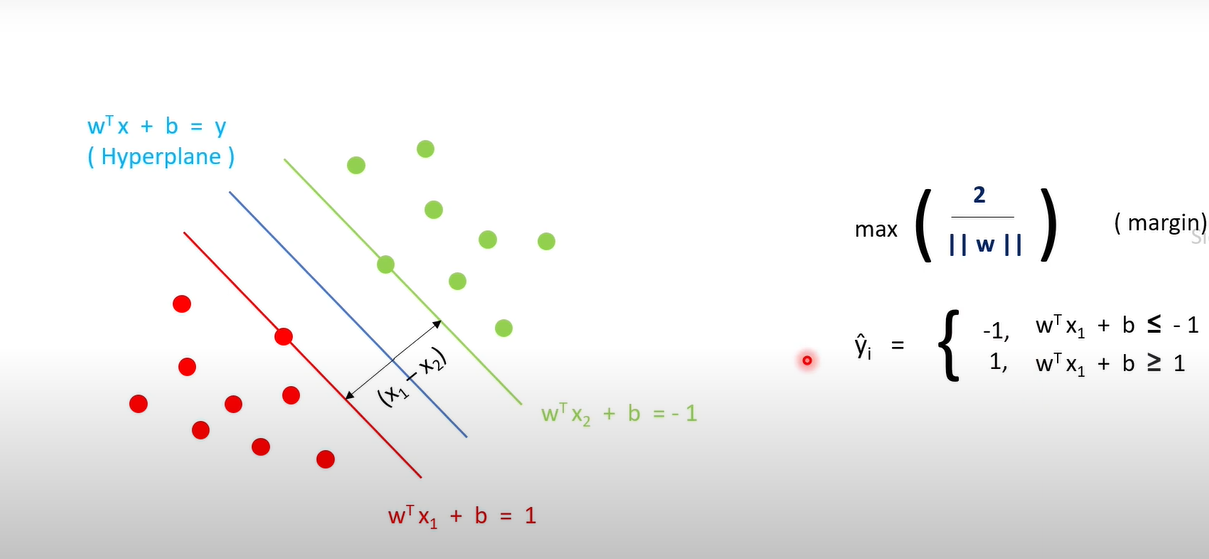

### KERNEL

`Kernel Function` generally transforms the training set of data so that a non-linear decision surface can be transformed to a linear equation in a higher number of dimension spaces. It returns the inner product between two points in a standard feature dimension.

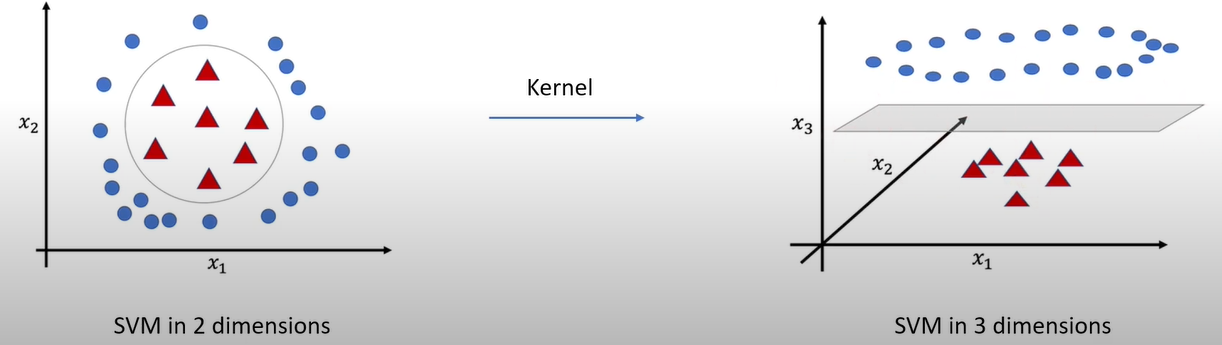

Types of SVM Kernels :
1. Linear
2. Polynomial
3. Radial Basis Functions(rbf)
4. Sigmoid

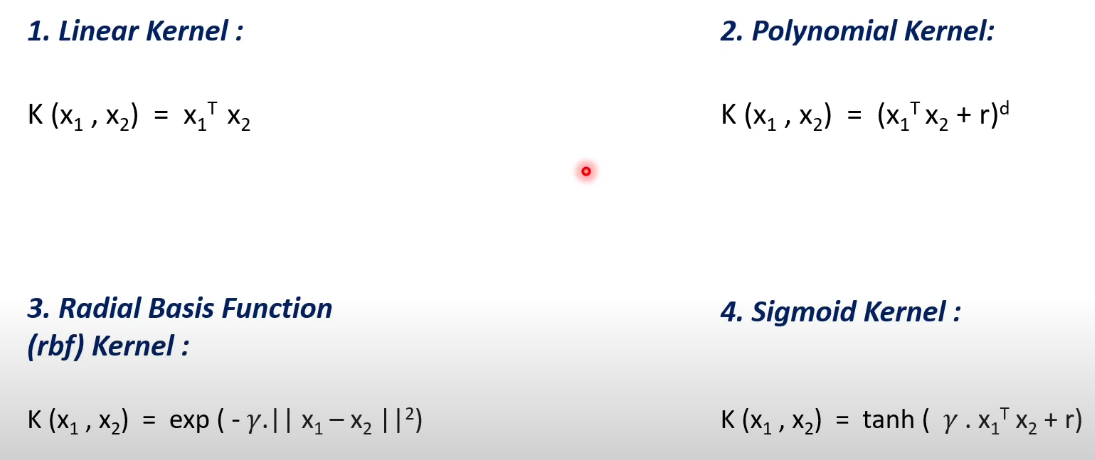

### Loss Function

Loss function measures how far an estimated value is from its value.

It is helpful to determine which model perform better & which parameters are better.

For Support Vector Machine Classifier `Hinge Loss` is used as the Loss Function.

#### Hinge Loss

`Hinge Loss` is one type of Loss Function, mainly used for `maximum margin` classification models.

Hinge loss incorporate a margin or a distance from a classification boundary into the loss calculations. Even if new observations are classified correctly, they can incur a penalty if the margin form the decision boundary is not large enough.

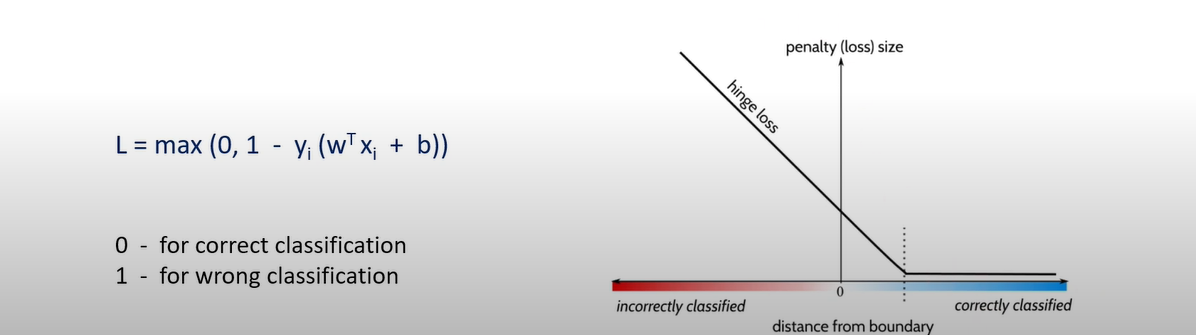

### Gradient Descent

Gradient descent is an optimization algorithm used for minimising the cost function in various mathematical learning algorithms. It is used for updating the parameters of learning model.

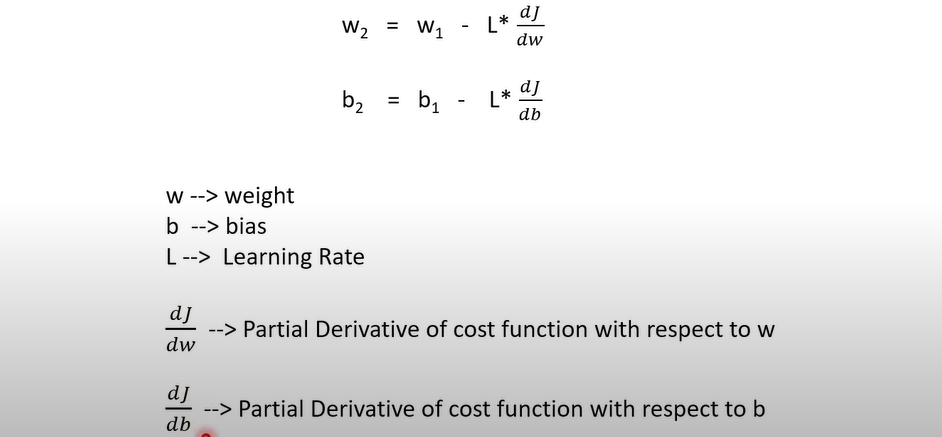

In [1]:
# importing dependencies

import numpy as np

Support Vector Machine Classifier

In [2]:
class SVM_classifier():


  # initiating the hyperparameters
  def __init__(self, learning_rate, no_of_iterations, lambda_parameter):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.lambda_parameter = lambda_parameter


  
  # fitting the dataset to SVM Classifier
  def fit(self, X, Y):

    # m  --> number of Data points --> number of rows
    # n  --> number of input features --> number of columns
    self.m, self.n = X.shape

    # initiating the weight value and bias value

    self.w = np.zeros(self.n)

    self.b = 0

    self.X = X

    self.Y = Y

    # implementing Gradient Descent algorithm for Optimization

    for i in range(self.no_of_iterations):
      self.update_weights()



  # function for updating the weight and bias value
  def update_weights(self):

    # label encoding
    y_label = np.where(self.Y <= 0, -1, 1)



    # gradients ( dw, db)
    for index, x_i in enumerate(self.X):

      condition = y_label[index] * (np.dot(x_i, self.w) - self.b) >= 1

      if (condition == True):

        dw = 2 * self.lambda_parameter * self.w
        db = 0

      else:

        dw = 2 * self.lambda_parameter * self.w - np.dot(x_i, y_label[index])
        db = y_label[index]


      self.w = self.w - self.learning_rate * dw

      self.b = self.b - self.learning_rate * db



  # predict the label for a given input value
  def predict(self, X):

    output = np.dot(X, self.w) - self.b
    
    predicted_labels = np.sign(output)

    y_hat = np.where(predicted_labels <= -1, 0, 1)

    return y_hat
